<a href="https://colab.research.google.com/github/kumarmayank29/Fashsion_MNIST/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [34]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Model

**FASHION MNIST**


We will use Fashion MNIST Dataset.It consists of 28*28 Gray Scale images.It has same number of sample ie 60000.How is it different from MNIST.Instead of handwritten images there are images of different types of clothing like we have images of T-shirts ,pants ,boots,shoes ,Sandles etc.

**What is Out Job ??**

Our job is to classify images to correct category. 


**Label**

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top 

1.   Trouser 
2.   Pullover 
3.   Dress 
4.   Coat
5.   Sandal 
6.   Shirt 
7.   Sneaker
8.   Bag 
9.   Ankle boot


In [35]:

(x_train,y_train), (x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [36]:

x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [39]:
y_test.shape

(10000,)

In [40]:
x_train[0].shape

(28, 28)

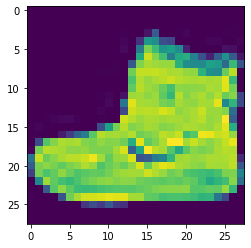

In [41]:
import matplotlib. pyplot as plt 
plt.imshow(x_train[0])#Heatmap

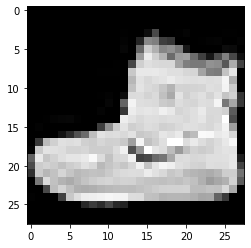

In [42]:
import matplotlib. pyplot as plt 
plt.imshow(x_train[0],cmap='gray')#Heatmap

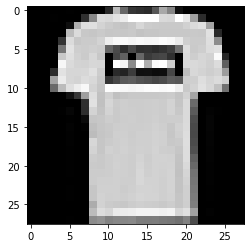

In [43]:
plt.imshow(x_train[1],cmap='gray')

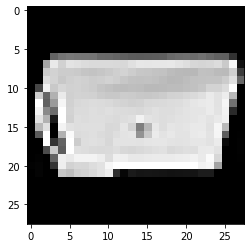

In [44]:
plt.imshow(x_train[110],cmap='gray')

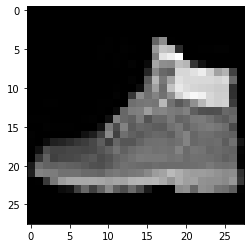

In [45]:
plt.imshow(x_train[90],cmap='gray')

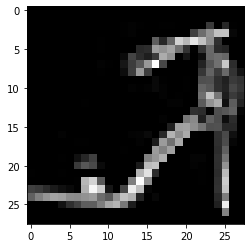

In [46]:
plt.imshow(x_train[8],cmap='gray')

In [47]:
y_train[8]

5

In [48]:
x_train[0]

#Values are mnot scaled and We very well know the fact that ML model performs best on Data that are centered around Zero

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Standardising The Data

In [49]:
x_train,x_test=x_train/255.0,x_test/255.0

Note:When we look at shape of x_train .Here shape of our x_train is 60000.28.28 ie(N.H.W) but CNN which has been typically made for coloured images expects input shape to be of format (N.H.W.C) ie the image needs to have a color Channel .Although we know that for a gray Scale Image Color Channel is 0 .So some how we need to convert N.H.W to N.H.W.C .So its compatible wrt CNN


So here we will be handling this problem by adding at extra dimension of size 1 which effectively means no data is being added.After doing this operation the new shape will be N.H.W.C



In [50]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [51]:
#Now the dimensions of x_train are of form N*H*W*C and suitable for CNN
x_train.shape

(60000, 28, 28, 1)

In [52]:
#Now the dimensions of x_test are of form N*H*W*C and suitable for CNN
x_test.shape

(10000, 28, 28, 1)

In [53]:
#Number of Classes in the Dataset

#Since set returns unique values only thats why set has been used to get all classes in Dataset
K=len(set(y_train))
print("Classes of Dataset",set(y_train))
print("Total Count of Classes",K)


Classes of Dataset {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Total Count of Classes 10


In [54]:
x_train[1].shape

(28, 28, 1)

**We will be using Function API of Keras.**

***Explanation of Below Convolution Code***
1. i=Input(x_train[0].shape)

The shape of input x_train matrix over which the filter will convolve


2. x=Conv2D(32,(3,3),strides=2,activation='relu')(i)

Extraxt 32 features with Kernel Size of (3,3) and Since we are using Convolution with Pooling Togeather 
So we select stride as 2 ie Strided Convolution 

3. x=Conv2D(64,(3,3),strides=2,activation='relu')(x)

Extract 64 Features(this is a hyper parameter we could also choose it to be 32 again) but in Practical cases
Convolution is based on working on Hierchical Feature Extraction Funda,So at every convolution stride layer 
it is going to extract more and more features so it is advisable to to extract more features


x=Conv2D(128,(3,3),strides=2,activation='relu')(x)


When image comes out of convolution it is 3D ie in form of (H * W * Number of features).But 
Feedforward Neural Network takes input as a 1D object .Therefore Dense Layer Expects input to be 
1D Layer and solution to that is the use of "Flatten Layer" in Keras so shape becomes of format(N,D)
The only Reason we are able to use flatten here is all  are Square Images had they not been Square Images 
Then we would have to use Global Max Pooling

In [55]:
#Build the model

i=Input(x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #CREATING A DENSE LAYER WITH 512 NEURONS
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x) #OUTPUT LAYER,K REPRESENTS NUMBER OF CLASSES

model=Model(i,x)



In [56]:
#Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [57]:
#Fit the model
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7051 - accuracy: 0.7442 - val_loss: 0.4189 - val_accuracy: 0.8395
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8579 - val_loss: 0.3603 - val_accuracy: 0.8647
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8803 - val_loss: 0.3236 - val_accuracy: 0.8787
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8941 - val_loss: 0.3251 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9031 - val_loss: 0.3028 - val_accuracy: 0.8902
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2324 - accuracy: 0.9118 - val_loss: 0.2942 - val_accuracy: 0.8973
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2107 - accuracy: 0.9173 - val_loss: 0.2884 - val_accuracy:

**Our Observation**

**We are getting a descent accuracy (accuracy: 0.9539,val_accuracy: 0.9020)but its definately not as high  as MNIST dataset.That because Fasion MNIST is far more typical dataset than MNIST**

#**Plot Loss per iteration**

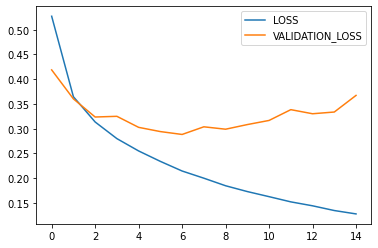

In [61]:
#Plot Loss per iteration
plt.plot(r.history['loss'],label='LOSS')
plt.plot(r.history['val_loss'],label='VALIDATION_LOSS')
plt.legend()




**OBSERVATION**

**1.It appears that a model is overfitting a little bit since we see validation loss is going up,had it been stagnant or constant it would have been better but as per graph we observe val_loss is going up after approximately 13 Epochs.Also loss wrt to training data is reducing constantly but wrt validation_data loss is in increasing pattern according to graph**






#**Plot Accuracy Per interation**

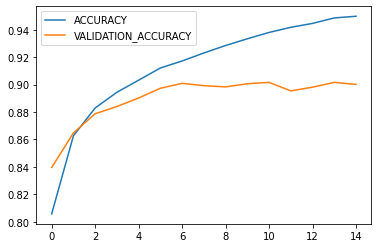

In [60]:
#Plot Accuracy per iteration
plt.plot(r.history['accuracy'],label='ACCURACY')
plt.plot(r.history['val_accuracy'],label='VALIDATION_ACCURACY')
plt.legend()

##**Observation**
**If we carefully observe the graph we'll Realize that validation_accuracy is some what constant but validation_loss in increasing in nature as we see from previous graph.**

**What does this mean?**

**Giving almost constant val_accuracy and increasing validation loss!This means that our model becomes more and more confident in making incorrect predictions**


##**Plotting Confusion Matrix**

Confusion matrix, without normalization
[[857   2  26  20   1   1  84   0   9   0]
 [  2 971   1  16   3   1   5   0   1   0]
 [ 14   0 857  10  57   0  62   0   0   0]
 [ 11   1  20 920  24   0  24   0   0   0]
 [  2   1  55  28 834   0  79   0   1   0]
 [  0   0   0   0   0 989   0   7   0   4]
 [128   0  78  29  68   1 687   0   9   0]
 [  0   0   0   0   0  17   0 965   1  17]
 [  1   0   5   3   6   4   8   2 971   0]
 [  0   0   0   0   0  10   1  39   0 950]]


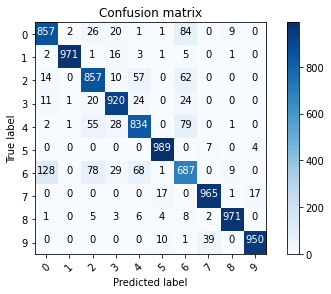

In [67]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
#Our model is predicting on x_test and storing answer of prediction in p_test
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Observation Table

The tabel has three Columns N(Number of Miss-classifications) and other two columns are actual and predicted Labels.Please look below attachment
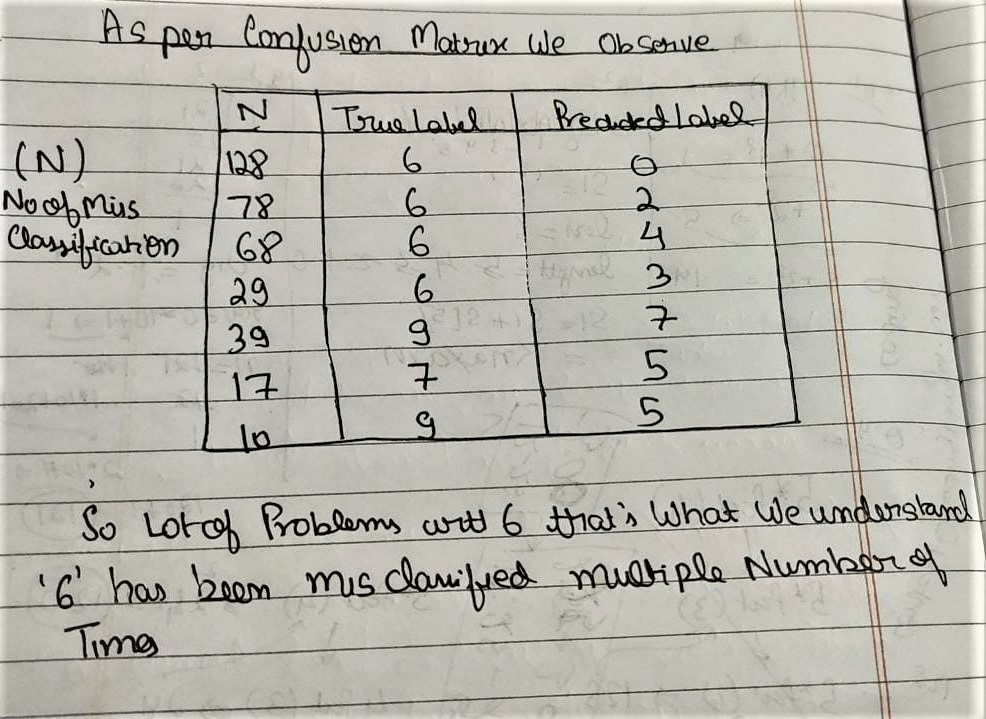



We already know that the dataset consists of cloths item and each cloth category is assigned a number as below 


  0: T-shirt/top

1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

Some of miss-classifications done by model, which had high probability of being miss-classified are as follows

1. 6 as 0 ie Shirt as T-Shirt/top
2. 6 as 2 ie Shirt as Pullover
3. 6 as 4 ie Shirt as Coat
4. 6 as 3 ie Shirt as Dress
5. 9 as 7 Ankle boot as Sneaker
6. Sneaker as Sandle
7. Ankle boot as Sandle

So above 7 had high  chances of getting missclassified miss-classification

  



**Lets Manually see Some Miss-Classified Samples**

In [78]:
np.where(p_test!=y_test)

#This is basically array of arrays

(array([  12,   23,   40,   42,   44,   48,   49,   53,   66,   67,   68,
          98,  103,  117,  127,  135,  136,  147,  150,  156,  172,  212,
         239,  244,  247,  248,  252,  255,  266,  271,  316,  324,  325,
         361,  378,  381,  382,  387,  389,  394,  396,  404,  406,  425,
         437,  441,  444,  452,  454,  460,  474,  476,  511,  526,  529,
         541,  558,  563,  594,  612,  622,  628,  634,  635,  639,  659,
         661,  670,  681,  688,  689,  711,  716,  724,  732,  736,  753,
         760,  762,  764,  767,  787,  800,  801,  851,  856,  860,  875,
         881,  905,  909,  910,  921,  927,  939,  948,  956,  960,  965,
         966,  971,  976,  977,  979,  984,  997, 1000, 1005, 1028, 1046,
        1074, 1079, 1082, 1100, 1107, 1111, 1121, 1130, 1131, 1142, 1152,
        1158, 1162, 1165, 1194, 1197, 1210, 1217, 1231, 1236, 1254, 1280,
        1285, 1286, 1294, 1300, 1305, 1312, 1326, 1336, 1353, 1388, 1394,
        1408, 1425, 1438, 1449, 1455, 

In [77]:
np.where(p_test!=y_test)[0]
#Single array

array([  12,   23,   40,   42,   44,   48,   49,   53,   66,   67,   68,
         98,  103,  117,  127,  135,  136,  147,  150,  156,  172,  212,
        239,  244,  247,  248,  252,  255,  266,  271,  316,  324,  325,
        361,  378,  381,  382,  387,  389,  394,  396,  404,  406,  425,
        437,  441,  444,  452,  454,  460,  474,  476,  511,  526,  529,
        541,  558,  563,  594,  612,  622,  628,  634,  635,  639,  659,
        661,  670,  681,  688,  689,  711,  716,  724,  732,  736,  753,
        760,  762,  764,  767,  787,  800,  801,  851,  856,  860,  875,
        881,  905,  909,  910,  921,  927,  939,  948,  956,  960,  965,
        966,  971,  976,  977,  979,  984,  997, 1000, 1005, 1028, 1046,
       1074, 1079, 1082, 1100, 1107, 1111, 1121, 1130, 1131, 1142, 1152,
       1158, 1162, 1165, 1194, 1197, 1210, 1217, 1231, 1236, 1254, 1280,
       1285, 1286, 1294, 1300, 1305, 1312, 1326, 1336, 1353, 1388, 1394,
       1408, 1425, 1438, 1449, 1455, 1460, 1482, 14

In [85]:
#Label Mapping
labels='''T-Shirt/Top
Trouser
Pullover
Dress
Coat
Sandle
Shirt
Sneaker
Bag 
Ankle Boot'''.split("\n")


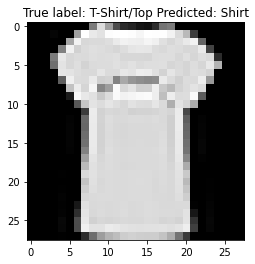

In [86]:
#Some miss-classifications
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

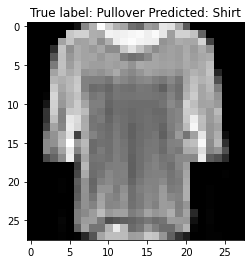

In [88]:
#Some miss-classifications
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

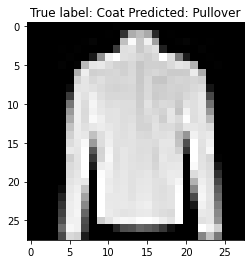

In [90]:
#Some miss-classifications
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

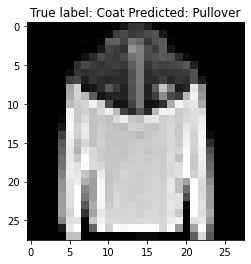

In [91]:
#Some miss-classifications
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

#Very Much Confusing 

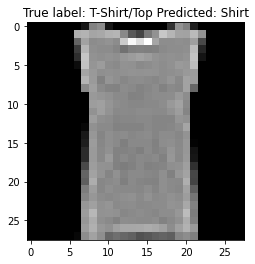

In [92]:
#Some miss-classifications
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
